## Goal: Convert FITS images from galactic to celestial coordinates, saving new FITS file.

### 1. Read in and plot FITS images, with correct WCS projection. 

In [151]:
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np

In [199]:
file = 'planck_herschel.fits'
hdu = fits.open(file)[0]
data = hdu.data
wcs = WCS(hdu.header)

<IPython.core.display.Javascript object>


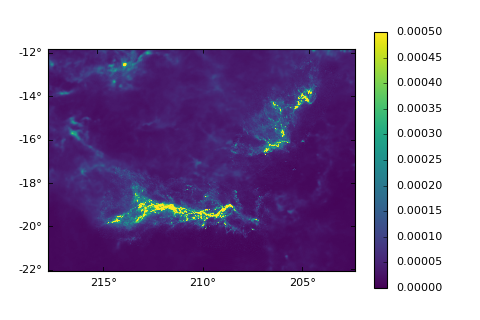

In [165]:
fig = plt.figure()
plane = 0
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=wcs, slices=('x','y',plane))
#ax.coords[2].set_ticks(exclude_overlapping=True)
image = data[plane, :, :]
limits = (np.min(image), np.max(image))
cax = ax.imshow(image, cmap=plt.cm.viridis, interpolation='none', clim=(0,5e-4)) # 0,5e-4 is the correct dynamic range.
#cax = ax.imshow(image.transpose(), cmap=plt.cm.viridis, interpolation='none')
cbar = fig.colorbar(cax)

### 2. Transform the galactic coordinate axis of the image to celestial coordinates.

http://reproject.readthedocs.org/en/stable/celestial.html

In [200]:
from reproject import reproject_interp

In [195]:
new_header = hdu.header.copy()
new_header['CTYPE1'] = 'GLON-CAR'
new_header['CTYPE2'] = 'GLAT-CAR'
new_image, footprint = reproject_interp(hdu, new_header)

<IPython.core.display.Javascript object>


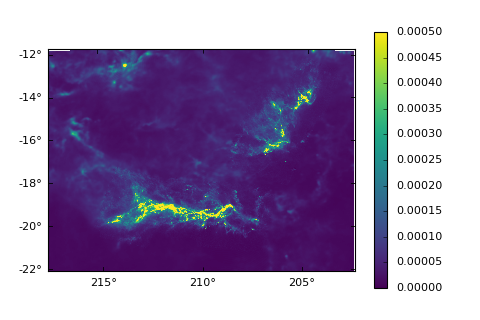

In [197]:
data = new_image
wcs = WCS(new_header)

fig = plt.figure()
plane = 0
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=wcs, slices=('x','y',plane))
#ax.coords[2].set_ticks(exclude_overlapping=True)
image = data[plane, :, :]
limits = (np.min(image), np.max(image))
cax = ax.imshow(image, cmap=plt.cm.viridis, interpolation='none', clim=(0,5e-4)) # 0,5e-4 is the correct dynamic range.
#cax = ax.imshow(image.transpose(), cmap=plt.cm.viridis, interpolation='none')
cbar = fig.colorbar(cax)

In [225]:
from reproject import reproject_interp
from astropy import units as u
from astropy.coordinates import SkyCoord
new_header = hdu.header.copy()
crval_gal = SkyCoord(l=new_header['CRVAL1']*u.deg, b=new_header['CRVAL2']*u.deg, frame='galactic')

new_header['CTYPE1'] = 'RA-TAN'
new_header['CTYPE2'] = 'DEC-TAN'
new_header['CRVAL1'] = crval_gal.icrs.ra.value
new_header['CRVAL2'] = crval_gal.icrs.dec.value

wcs.axis_type_names
wcs

#new_image, footprint = reproject_interp(hdu, new_header)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'GLON-TAN'  'GLAT-TAN'  ''  
CRVAL : 210.0  -19.0  0.0  
CRPIX : 1735.0  783.0  0.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0041666666666699999  0.0041666666666699999  1.0  
NAXIS    : 3444 2492

In [230]:
crval_gal.galactic.l.value

210.0

In [272]:

radec = SkyCoord(ra='05 36 25.43', dec='-06 42 57.7', unit=(u.hourangle, u.degree), frame='icrs')
radec

<SkyCoord (ICRS): (ra, dec) in deg
    (84.10595833, -6.71602778)>

In [266]:
#SkyCoord(ra='05:36:25.43'*u.hourangle, dec='-06:42:57.7'*u.deg, frame='icrs')
from astropy.coordinates import Angle
print(Angle('1 2 30.43 deg'))
a = Angle('1 2 30.43 hours')
a.to(u.deg).value

1d02m30.43s


15.626791666666668

In [284]:
def radec2glat(ra, dec):
    if " " or ":" in ra:
    #if True:
        # RA is in h/m/s
        units = (u.hourangle, u.degree)
    else:
        # RA is in deg
        units = (u.degree, u.degree)
    radec = SkyCoord(ra=ra, dec=dec, unit=units, frame='icrs')
    glonlat = radec.galactic
    return glonlat.b.value

def radec2glon(ra, dec):
    if " " or ":" in ra:
    #if True:
        # RA is in h/m/s
        units = (u.hourangle, u.degree)
    else:
        # RA is in deg
        units = (u.degree, u.degree)
    radec = SkyCoord(ra=ra, dec=dec, unit=units, frame='icrs')
    glonlat = radec.galactic
    return glonlat.l.value

In [285]:
ra = np.array(['05 36 25.43','05 35 50.45'])
dec = np.array(['-06 42 57.7','-05 28 34.9'])
print(radec2glat(ra,dec), radec2glon(ra,dec))


[-19.72416379 -19.29748579] [ 210.4045835   209.16021164]
